# Population Data from CSV

This notebooks reads sample population data from `data/atlantis.csv` and plots it using Matplotlib. Edit `data/atlantis.csv` and re-run this cell to see how the plots change!

In [19]:
from hiive.mdptoolbox import mdp,example
from hiive import mdptoolbox
from gym.envs.toy_text.frozen_lake import generate_random_map


generate_random_map()
print(generate_random_map())


P, R = mdptoolbox.example.forest()
vi = mdptoolbox.mdp.ValueIteration(P, R, 0.9)
vi.run()



['SFFFFFFF', 'HFHFFFFF', 'FFFFFFFF', 'FHFFFFHF', 'FFHFFHFF', 'FFHFFFFF', 'FFFFFFFF', 'FFHFFHFG']


[{'State': None,
  'Action': None,
  'Reward': 4.0,
  'Error': 4.0,
  'Time': 2.9087066650390625e-05,
  'Max V': 4.0,
  'Mean V': 1.6666666666666667,
  'Iteration': 1},
 {'State': None,
  'Action': None,
  'Reward': 7.24,
  'Error': 3.24,
  'Time': 8.511543273925781e-05,
  'Max V': 7.24,
  'Mean V': 3.7633333333333336,
  'Iteration': 2},
 {'State': None,
  'Action': None,
  'Reward': 9.9373,
  'Error': 2.6973000000000003,
  'Time': 0.00012445449829101562,
  'Max V': 9.9373,
  'Mean V': 6.190633333333333,
  'Iteration': 3},
 {'State': None,
  'Action': None,
  'Reward': 12.291970000000001,
  'Error': 2.3546700000000005,
  'Time': 0.0001556873321533203,
  'Max V': 12.291970000000001,
  'Mean V': 8.545303333333335,
  'Iteration': 4},
 {'State': None,
  'Action': None,
  'Reward': 14.411173000000002,
  'Error': 2.1192030000000006,
  'Time': 0.00018525123596191406,
  'Max V': 14.411173000000002,
  'Mean V': 10.664506333333334,
  'Iteration': 5},
 {'State': None,
  'Action': None,
  'Reward'

In [5]:
from hiive import mdptoolbox


P, R = mdptoolbox.example.rand(10, 3)
pi = mdptoolbox.mdp.PolicyIteration(P, R, 0.9)
pi.run()

[{'State': None,
  'Action': None,
  'Reward': 4.802519001159639,
  'Error': 0.49106366731490914,
  'Time': 0.0005025863647460938,
  'V[0]': 3.166269195173505,
  'Max V': 4.802519001159639,
  'Mean V': 3.68382901480731,
  'Iteration': 1},
 {'State': None,
  'Action': None,
  'Reward': 4.802519001159639,
  'Error': 0.04403228426922379,
  'Time': 0.0009121894836425781,
  'V[0]': 3.2665802764040435,
  'Max V': 4.802519001159639,
  'Mean V': 3.7979623573641383,
  'Iteration': 2},
 {'State': None,
  'Action': None,
  'Reward': 4.802519001159639,
  'Error': 8.881784197001252e-16,
  'Time': 0.0011630058288574219,
  'V[0]': 3.2774068315020273,
  'Max V': 4.802519001159639,
  'Mean V': 3.8058274118064963,
  'Iteration': 3}]

In [10]:
random_map = generate_random_map(size=3, p=0.98)
P, R = mdptoolbox.example.openai("FrozenLake-v1", desc=random_map)

In [23]:
from hiive.mdptoolbox import mdp,example
from hiive import mdptoolbox
from gym.envs.toy_text.frozen_lake import generate_random_map
import numpy as np




# P, R = mdptoolbox.example.openai("FrozenLake-v1")
# vi = mdptoolbox.mdp.ValueIteration(P, R, 0.9)
# vi.run()


value_f = [0]*10
policy = [0]*10
iters = [0]*10
time_array = [0]*10
gamma_arr = [0] * 10
for i in range(0,10):
    pi = mdptoolbox.mdp.ValueIteration(P, R, (i+0.5)/10)
    pi.run()
    gamma_arr[i]=(i+0.5)/10
    value_f[i] = np.mean(pi.V)
    policy[i] = pi.policy
    iters[i] = pi.iter
    time_array[i] = pi.time



In [31]:
for i in range(0,10):
    pi = mdptoolbox.mdp.PolicyIteration(P, R, (i+0.5)/10)
    pi.run()
    gamma_arr[i]=(i+0.5)/10
    value_f[i] = np.mean(pi.V)
    policy[i] = pi.policy
    iters[i] = pi.iter
    time_array[i] = pi.time

In [32]:
pi.time

0.0007929801940917969

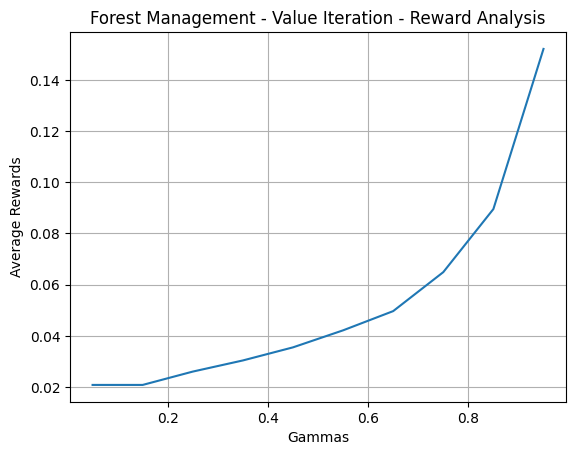

In [27]:
plt.plot(gamma_arr,value_f)
plt.xlabel('Gammas')
plt.ylabel('Average Rewards')
plt.title('Forest Management - Value Iteration - Reward Analysis')
plt.grid()
plt.show()

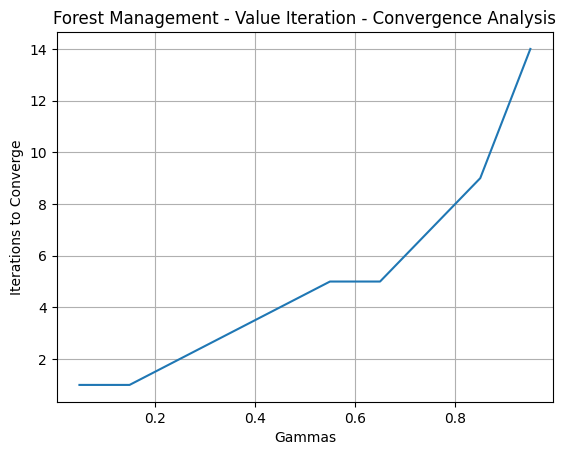

In [28]:
plt.plot(gamma_arr,iters)
plt.xlabel('Gammas')
plt.ylabel('Iterations to Converge')
plt.title('Forest Management - Value Iteration - Convergence Analysis')
plt.grid()
plt.show()

In [15]:
import numpy as np
import gym
from gym import wrappers
import time
import sys
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from gym.envs.toy_text.frozen_lake import generate_random_map, FrozenLakeEnv
import glob

np.random.seed(10)
twenty = generate_random_map(20)
MAPS = {
    "20x20": twenty
}

def run_process(env, policy, gamma, render = True):
    obs = env.reset()
    total_reward = 0
    step_idx = 0
    while True:
        if render:
            env.render()
        obs, reward, done , _ = env.step(int(policy[obs]))
        total_reward += (gamma ** step_idx * reward)
        step_idx += 1
        if done:
            break
    return total_reward

def evaluate_policy(env, policy, gamma , n = 100):
    scores = [run_process(env, policy, gamma, False) for _ in range(n)]
    return np.mean(scores)

def get_policy(env,v, gamma):
    policy = np.zeros(env.nS)
    for s in range(env.nS):
        q_sa = np.zeros(env.nA)
        for a in range(env.nA):
            q_sa[a] = sum([p * (r + gamma * v[s_]) for p, s_, r, _ in  env.P[s][a]])
        policy[s] = np.argmax(q_sa)
    return policy

def compute_policy(env, policy, gamma):
    v = np.zeros(env.nS)
    eps = 1e-5
    while True:
        prev_v = np.copy(v)
        for s in range(env.nS):
            policy_a = policy[s]
            v[s] = sum([p * (r + gamma * prev_v[s_]) for p, s_, r, is_done in env.P[s][policy_a]])
        if (np.sum((np.fabs(prev_v - v))) <= eps):
            break
    return v

def run_policy_iteration(env, gamma):
    policy = np.random.choice(env.nA, size=(env.nS))
    max_iters = 200000
    desc = env.unwrapped.desc
    for i in range(max_iters):
        old_policy_v = compute_policy(env, policy, gamma)
        new_policy = get_policy(env,old_policy_v, gamma)
        if (np.all(policy == new_policy)):
            k=i+1
            break
        policy = new_policy
    return policy,k

def run_value_iteration(env, gamma):
    v = np.zeros(env.nS)  # initialize value-function
    max_iters = 100000
    eps = 1e-20
    desc = env.unwrapped.desc
    for i in range(max_iters):
        prev_v = np.copy(v)
        for s in range(env.nS):
            q_sa = [sum([p*(r + gamma*prev_v[s_]) for p, s_, r, _ in env.P[s][a]]) for a in range(env.nA)]
            v[s] = max(q_sa)
        if (np.sum(np.fabs(prev_v - v)) <= eps):
            k=i+1
            break
    return v,k
